In [1]:
import os
from pathlib import Path
os.chdir(Path.cwd().parent)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_map

In [3]:
data_dir = Path.cwd().parent/"data"/"iV2I+"
ros_dir = data_dir/"ros"
mobile_dir = data_dir/"client"
result_dir = data_dir/"merged"


# ROS dataframes
static_df = "df_static.parquet"
static_map = "df_static_map.parquet"

# Base station position
bs_x = 9
bs_y = 9

In [13]:
ros_subdirs = [d for d in ros_dir.iterdir() if d.is_dir()]

In [14]:
map_info = pd.read_parquet(ros_subdirs[10]/static_df).iloc[0]
map_elevation = pd.read_parquet(ros_subdirs[10]/static_map)

In [15]:
map_info

Origin_x               -55.000001
Origin_y               -55.000001
Base_Station_x          64.000001
Base_Station_y          64.000001
static_resolution        0.100000
far_resolution           0.100000
near_resolution          0.030000
id_min               11770.000000
id_max               12667.000000
width_static          1100.000000
height_static         1100.000000
width_far              200.000000
height_far             200.000000
width_near             233.000000
height_near            233.000000
Name: 0, dtype: float64

In [16]:
origin_x = map_info.Origin_x
origin_y = map_info.Origin_y
res = map_info.static_resolution
width = int(map_info.width_static)
height = int(map_info.height_static)

width_m = res * width
height_m = res * height

end_x = origin_x + width_m
end_y = origin_y + height_m

map_np = np.array(map_elevation).reshape((height, width))
map_np = np.flip(map_np, 0)

extent = [origin_x, end_x, origin_y, end_y]
x_coords = np.arange(origin_x, end_x, res)
y_coords = np.arange(origin_y, end_y, res)

In [17]:
map_df = pd.DataFrame(map_np, columns=x_coords, index=y_coords[::-1])
map_df[map_df == -1] = np.nan
map_df = map_df.dropna(how='all', axis=0).dropna(how='all', axis=1)
map_df

,-32.000001,-31.900001,-31.800001,-31.700001,-31.600001,-31.500001,-31.400001,-31.300001,-31.200001,-31.100001,...,14.699999,14.799999,14.899999,14.999999,15.099999,15.199999,15.299999,15.399999,15.499999,15.599999
31.699999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.599999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.499999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.399999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-54.400001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-54.500001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-54.600001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-54.700001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
map_df.describe()

,-32.000001,-31.900001,-31.800001,-31.700001,-31.600001,-31.500001,-31.400001,-31.300001,-31.200001,-31.100001,...,14.699999,14.799999,14.899999,14.999999,15.099999,15.199999,15.299999,15.399999,15.499999,15.599999
count,8.000000,13.000000,16.000000,16.00000,27.000000,30.000000,30.000000,33.000000,39.000000,40.000000,...,46.000000,40.000000,37.000000,33.000000,29.000000,24.000000,21.000000,18.000000,12.000000,6.000000
mean,3.625000,3.153846,3.250000,3.50000,3.185185,2.800000,3.066667,3.030303,2.948718,3.000000,...,49.586957,50.500000,55.945946,59.969697,64.172414,70.458333,76.619048,79.833333,85.083333,86.666667
std,0.744024,0.987096,1.238278,1.36626,1.241495,1.423933,1.740657,1.648576,1.731271,1.585188,...,25.045360,24.981018,23.554837,20.735665,15.813803,11.887074,9.452387,7.838442,2.314316,2.065591
min,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,26.000000,27.000000,27.000000,28.000000,37.000000,52.000000,58.000000,65.000000,81.000000,84.000000
25%,3.750000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,27.000000,28.000000,28.000000,50.000000,52.000000,58.750000,71.000000,73.500000,83.000000,85.000000
50%,4.000000,4.000000,4.000000,4.00000,3.000000,2.500000,2.500000,2.000000,3.000000,3.000000,...,36.500000,39.000000,48.000000,57.000000,59.000000,70.500000,81.000000,83.500000,85.500000,88.000000
75%,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,75.250000,82.000000,83.000000,83.000000,81.000000,83.000000,84.000000,84.750000,87.000000,88.000000
max,4.000000,4.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,93.000000,91.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.000000,88.000000,88.000000


In [5]:
map_df = pd.read_parquet(data_dir/'static_map.parquet')
map_df.describe()

,-32.0,-31.9,-31.8,-31.7,-31.6,-31.5,-31.4,-31.3,-31.2,-31.1,...,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6
count,8.000000,13.000000,16.000000,16.00000,27.000000,30.000000,30.000000,33.000000,39.000000,40.000000,...,46.000000,40.000000,37.000000,33.000000,29.000000,24.000000,21.000000,18.000000,12.000000,6.000000
mean,3.625000,3.153846,3.250000,3.50000,3.185185,2.800000,3.066667,3.030303,2.948718,3.000000,...,49.586957,50.500000,55.945946,59.969697,64.172414,70.458333,76.619048,79.833333,85.083333,86.666667
std,0.744024,0.987096,1.238278,1.36626,1.241495,1.423933,1.740657,1.648576,1.731271,1.585188,...,25.045360,24.981018,23.554837,20.735665,15.813803,11.887074,9.452387,7.838442,2.314316,2.065591
min,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,26.000000,27.000000,27.000000,28.000000,37.000000,52.000000,58.000000,65.000000,81.000000,84.000000
25%,3.750000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,27.000000,28.000000,28.000000,50.000000,52.000000,58.750000,71.000000,73.500000,83.000000,85.000000
50%,4.000000,4.000000,4.000000,4.00000,3.000000,2.500000,2.500000,2.000000,3.000000,3.000000,...,36.500000,39.000000,48.000000,57.000000,59.000000,70.500000,81.000000,83.500000,85.500000,88.000000
75%,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,75.250000,82.000000,83.000000,83.000000,81.000000,83.000000,84.000000,84.750000,87.000000,88.000000
max,4.000000,4.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,93.000000,91.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.000000,88.000000,88.000000


In [34]:
map_df.describe()

,-32.0,-31.9,-31.8,-31.7,-31.6,-31.5,-31.4,-31.3,-31.2,-31.1,...,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6
count,8.000000,13.000000,16.000000,16.00000,27.000000,30.000000,30.000000,33.000000,39.000000,40.000000,...,46.000000,40.000000,37.000000,33.000000,29.000000,24.000000,21.000000,18.000000,12.000000,6.000000
mean,3.625000,3.153846,3.250000,3.50000,3.185185,2.800000,3.066667,3.030303,2.948718,3.000000,...,49.586957,50.500000,55.945946,59.969697,64.172414,70.458333,76.619048,79.833333,85.083333,86.666667
std,0.744024,0.987096,1.238278,1.36626,1.241495,1.423933,1.740657,1.648576,1.731271,1.585188,...,25.045360,24.981018,23.554837,20.735665,15.813803,11.887074,9.452387,7.838442,2.314316,2.065591
min,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,26.000000,27.000000,27.000000,28.000000,37.000000,52.000000,58.000000,65.000000,81.000000,84.000000
25%,3.750000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,27.000000,28.000000,28.000000,50.000000,52.000000,58.750000,71.000000,73.500000,83.000000,85.000000
50%,4.000000,4.000000,4.000000,4.00000,3.000000,2.500000,2.500000,2.000000,3.000000,3.000000,...,36.500000,39.000000,48.000000,57.000000,59.000000,70.500000,81.000000,83.500000,85.500000,88.000000
75%,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,75.250000,82.000000,83.000000,83.000000,81.000000,83.000000,84.000000,84.750000,87.000000,88.000000
max,4.000000,4.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,93.000000,91.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.000000,88.000000,88.000000


In [38]:
map_cols = np.array(map_df.columns, dtype=np.float64)
map_rows = np.array(map_df.index, dtype=np.float64)
map_cols

array([-32. , -31.9, -31.8, -31.7, -31.6, -31.5, -31.4, -31.3, -31.2,
       -31.1, -31. , -30.9, -30.8, -30.7, -30.6, -30.5, -30.4, -30.3,
       -30.2, -30.1, -30. , -29.9, -29.8, -29.7, -29.6, -29.5, -29.4,
       -29.3, -29.2, -29.1, -29. , -28.9, -28.8, -28.7, -28.6, -28.5,
       -28.4, -28.3, -28.2, -28.1, -28. , -27.9, -27.8, -27.7, -27.6,
       -27.5, -27.4, -27.3, -27.2, -27.1, -27. , -26.9, -26.8, -26.7,
       -26.6, -26.5, -26.4, -26.3, -26.2, -26.1, -26. , -25.9, -25.8,
       -25.7, -25.6, -25.5, -25.4, -25.3, -25.2, -25.1, -25. , -24.9,
       -24.8, -24.7, -24.6, -24.5, -24.4, -24.3, -24.2, -24.1, -24. ,
       -23.9, -23.8, -23.7, -23.6, -23.5, -23.4, -23.3, -23.2, -23.1,
       -23. , -22.9, -22.8, -22.7, -22.6, -22.5, -22.4, -22.3, -22.2,
       -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5, -21.4, -21.3,
       -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6, -20.5, -20.4,
       -20.3, -20.2, -20.1, -20. , -19.9, -19.8, -19.7, -19.6, -19.5,
       -19.4, -19.3,

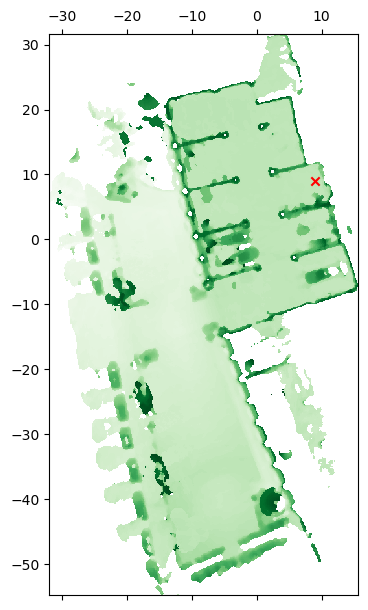

In [50]:
extent_df = [map_cols[0], map_cols[-1], map_rows[-1], map_rows[0]]
plt.imshow(map_df, cmap='Greens', extent=extent_df)
plt.scatter(bs_x,bs_y, c='red', marker='x')

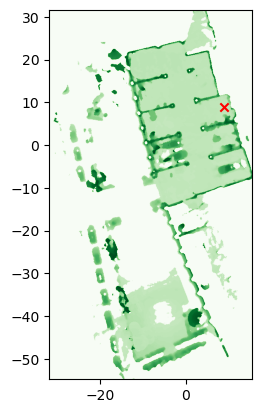

In [10]:
plot_map(map_df.where(map_df > 30, 0))
plt.scatter(bs_x,bs_y, c='red', marker='x')


In [23]:
map_save = pd.DataFrame(map_df).rename(columns={c: str(round(c,2)) for c in map_df.columns})#, columns=map_df.columns.astype(str))
map_save.describe()

,-32.0,-31.9,-31.8,-31.7,-31.6,-31.5,-31.4,-31.3,-31.2,-31.1,...,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6
count,8.000000,13.000000,16.000000,16.00000,27.000000,30.000000,30.000000,33.000000,39.000000,40.000000,...,46.000000,40.000000,37.000000,33.000000,29.000000,24.000000,21.000000,18.000000,12.000000,6.000000
mean,3.625000,3.153846,3.250000,3.50000,3.185185,2.800000,3.066667,3.030303,2.948718,3.000000,...,49.586957,50.500000,55.945946,59.969697,64.172414,70.458333,76.619048,79.833333,85.083333,86.666667
std,0.744024,0.987096,1.238278,1.36626,1.241495,1.423933,1.740657,1.648576,1.731271,1.585188,...,25.045360,24.981018,23.554837,20.735665,15.813803,11.887074,9.452387,7.838442,2.314316,2.065591
min,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,26.000000,27.000000,27.000000,28.000000,37.000000,52.000000,58.000000,65.000000,81.000000,84.000000
25%,3.750000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,27.000000,28.000000,28.000000,50.000000,52.000000,58.750000,71.000000,73.500000,83.000000,85.000000
50%,4.000000,4.000000,4.000000,4.00000,3.000000,2.500000,2.500000,2.000000,3.000000,3.000000,...,36.500000,39.000000,48.000000,57.000000,59.000000,70.500000,81.000000,83.500000,85.500000,88.000000
75%,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,75.250000,82.000000,83.000000,83.000000,81.000000,83.000000,84.000000,84.750000,87.000000,88.000000
max,4.000000,4.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,93.000000,91.000000,85.000000,85.000000,84.000000,84.000000,85.000000,88.000000,88.000000,88.000000


In [24]:
map_save.to_parquet(data_dir/'static_map.parquet')